# Mod 3 Project - County Population Effects on Median Income and Unemployment
## Ben Geissel & Rob Hermany
## Technical Audience Jupyter Notebook
### Load and Visualize Initial Data

In [16]:
import requests
import json
import pandas as pd
#import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import csv
import math
#import descartes
#import geoplot
#import plotly.figure_factory as ff
import scipy.stats as st
%reload_ext autoreload
%autoreload 2
import modules

In [17]:
pop_df = modules.census_api_data_cleaner()
rural_lookup = modules.rural_county_info_cleaner('County_Rural_Lookup.xlsx')
binned_pop_df = modules.classify_county_populations(pop_df, rural_lookup)

In [18]:
employment_df = modules.income_unemployment_cleaner('Unemployment.csv')

In [19]:
county_df = binned_pop_df.merge(employment_df[['FIPS', 'Unemployment_rate_2017', 'Median_Household_Income_2017']], on = 'FIPS', how = 'inner')

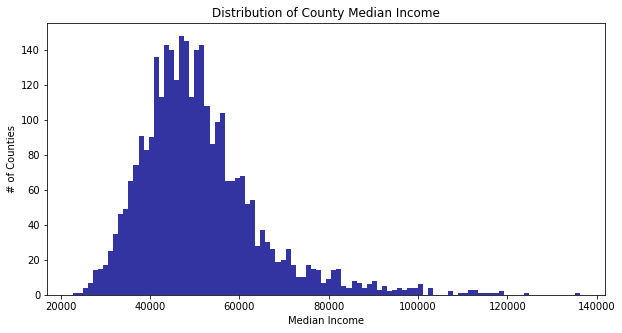

In [20]:
fig = plt.figure()
county_df.Median_Household_Income_2017.hist(bins = 100, grid = False, color = 'Darkblue', alpha = .8, figsize = (10,5))
plt.xlabel("Median Income")
plt.ylabel("# of Counties")
plt.title("Distribution of County Median Income")
plt.show()

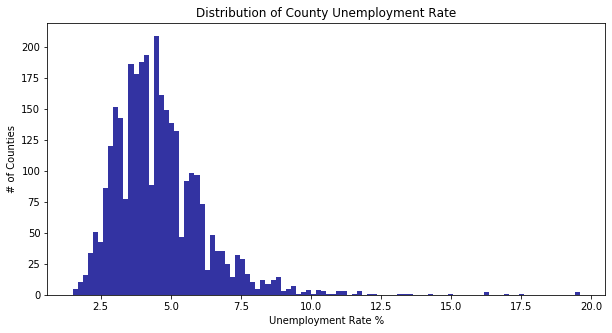

In [21]:
county_df.Unemployment_rate_2017.hist(bins = 100, grid = False, color = 'Darkblue', alpha = .8, figsize = (10,5))
plt.xlabel("Unemployment Rate %")
plt.ylabel("# of Counties")
plt.title("Distribution of County Unemployment Rate")
plt.show()

### Statistics Calculations

In [22]:
pop_income_mean, pop_income_std, pop_UE_mean, pop_UE_std = modules.calculate_means_stds(county_df)

In [23]:
urban_county_df = county_df.loc[county_df.pop_category == 'Urban']
mix_county_df = county_df.loc[county_df.pop_category == 'Mix/Suburban']
rural_county_df = county_df.loc[county_df.pop_category == 'Rural']

In [24]:
urban_income_mean, urban_income_std, urban_UE_mean, urban_UE_std = modules.calculate_means_stds(urban_county_df)
mix_income_mean, mix_income_std, mix_UE_mean, mix_UE_std = modules.calculate_means_stds(mix_county_df)
rural_income_mean, rural_income_std, rural_UE_mean, rural_UE_std = modules.calculate_means_stds(rural_county_df)

In [26]:
urban_count = urban_county_df.shape[0]
mix_count = mix_county_df.shape[0]
rural_count = rural_county_df.shape[0]

In [51]:
pop_income_z_data, pop_UE_z_data = modules.z_data(county_df, county_df)
urban_income_z_data, urban_UE_z_data = modules.z_data(county_df, urban_county_df)
mix_income_z_data, mix_UE_z_data = modules.z_data(county_df, mix_county_df)
rural_income_z_data, rural_UE_z_data = modules.z_data(county_df, rural_county_df)

## Hypothesis Testing
We assume a default alpha of 0.05

### Urban Hypotheses

Null Hypothesis: County median income is not affected by urban populations (pop_mean == urban_mean)  
Alternative Hypothesis: County median income is affected by urban populations (pop_mean != urban_mean)


Null Hypothesis: County unemployment rate is not affected by urban populations (pop_mean == urban_mean)  
Alternative Hypothesis: County unemployment rate is affected by urban populations (pop_mean != urban_mean)

#### Urban Median Income

In [11]:
print('mu: ', pop_income_mean)
print('sigma: ', pop_income_std)
print('x_bar: ', urban_income_mean)

mu:  51090.52944921999
sigma:  13497.965734376774
x_bar:  60977.04069767442


In [12]:
urban_inc_z, urban_inc_p = modules.z_test(urban_income_mean, pop_income_mean, pop_income_std)
print('z-stat: ', urban_inc_z)
print('p-value: ', urban_inc_p)
print()
modules.hypothesis(urban_inc_p)

z-stat:  0.7324445359403565
p-value:  0.23194864207897847

Fail to Reject Null Hypothesis


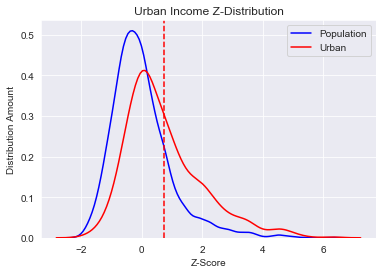

In [77]:
modules.z_plot(pop_income_z_data, urban_income_z_data, 'Urban Income')

#### Urban Unemployment Rate

In [13]:
print('mu: ', pop_UE_mean)
print('sigma: ', pop_UE_std)
print('x_bar: ', urban_UE_mean)

mu:  4.597739573384272
sigma:  1.6684744501355435
x_bar:  4.351162790697674


In [14]:
urban_UE_z, urban_UE_p = modules.z_test(urban_UE_mean, pop_UE_mean, pop_UE_std)
print('z-stat: ', urban_UE_z)
print('p-value: ', urban_UE_p)
print()
modules.hypothesis(urban_UE_p)

z-stat:  -0.14778577080791794
p-value:  0.5587440803636134

Fail to Reject Null Hypothesis


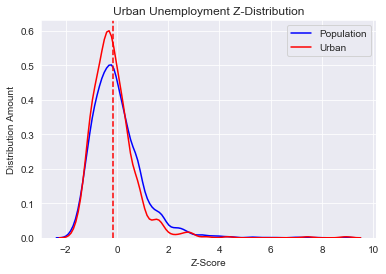

In [78]:
modules.z_plot(pop_UE_z_data, urban_UE_z_data, 'Urban Unemployment')

### Mix/Suburban Hypotheses

Null Hypothesis: County median income is not affected by mix/suburban populations (pop_mean == mix_mean)  
Alternative Hypothesis: County median income is affected by mix/suburban populations (pop_mean != mix_mean)


Null Hypothesis: County unemployment rate is not affected by mix/suburban populations (pop_mean == mix_mean)  
Alternative Hypothesis: County unemployment rate is affected by mix/suburban populations (pop_mean != mix_mean)

#### Mix Median Income

In [15]:
print('mu: ', pop_income_mean)
print('sigma: ', pop_income_std)
print('x_bar: ', mix_income_mean)

mu:  51090.52944921999
sigma:  13497.965734376774
x_bar:  50167.2248186946


In [16]:
mix_inc_z, mix_inc_p = modules.z_test(mix_income_mean, pop_income_mean, pop_income_std)
print('z-stat: ', mix_inc_z)
print('p-value: ', mix_inc_p)
print()
modules.hypothesis(mix_inc_p)

z-stat:  -0.06840324302897773
p-value:  0.5272676798423235

Fail to Reject Null Hypothesis


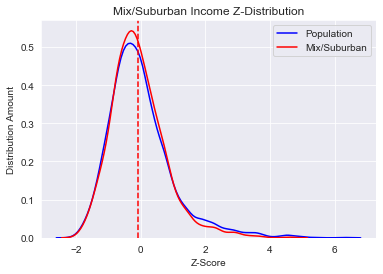

In [79]:
modules.z_plot(pop_income_z_data, mix_income_z_data, 'Mix/Suburban Income')

#### Mix Unemployment Rate

In [17]:
print('mu: ', pop_UE_mean)
print('sigma: ', pop_UE_std)
print('x_bar: ', mix_UE_mean)

mu:  4.597739573384272
sigma:  1.6684744501355435
x_bar:  4.609427880741338


In [18]:
mix_UE_z, mix_UE_p = modules.z_test(mix_UE_mean, pop_UE_mean, pop_UE_std)
print('z-stat: ', mix_UE_z)
print('p-value: ', mix_UE_p)
print()
modules.hypothesis(mix_UE_p)

z-stat:  0.007005385881765204
p-value:  0.4972052782399513

Fail to Reject Null Hypothesis


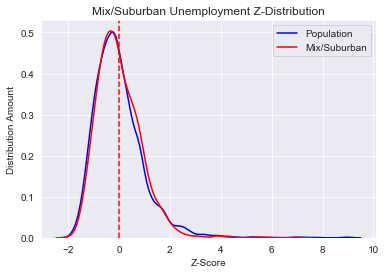

In [76]:
modules.z_plot(pop_UE_z_data, mix_UE_z_data, 'Mix/Suburban Unemployment')

### Rural Hypotheses

Null Hypothesis: County median income is not affected by rural populations (pop_mean == rural_mean)  
Alternative Hypothesis: County median income is affected by rural populations (pop_mean != rural_mean)


Null Hypothesis: County unemployment rate is not affected by rural populations (pop_mean == rural_mean)  
Alternative Hypothesis: County unemployment rate is affected by rural populations (pop_mean != rural_mean)

#### Rurual Median Income

In [23]:
print('mu: ', pop_income_mean)
print('sigma: ', pop_income_std)
print('x_bar: ', rural_income_mean)

mu:  51090.52944921999
sigma:  13497.965734376774
x_bar:  46423.78135313532


In [24]:
rural_inc_z, rural_inc_p = modules.z_test(rural_income_mean, pop_income_mean, pop_income_std)
print('z-stat: ', rural_inc_z)
print('p-value: ', rural_inc_p)
print()
modules.hypothesis(rural_inc_p)

z-stat:  -0.3457371420198042
p-value:  0.6352298658255482

Fail to Reject Null Hypothesis


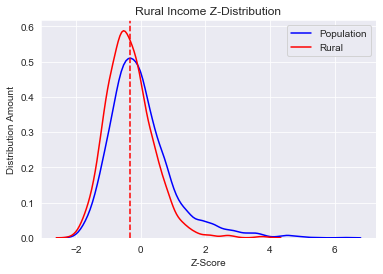

In [75]:
modules.z_plot(pop_income_z_data, rural_income_z_data, 'Rural Income')

#### Rural Unemployment Rate

In [25]:
print('mu: ', pop_UE_mean)
print('sigma: ', pop_UE_std)
print('x_bar: ', rural_UE_mean)

mu:  4.597739573384272
sigma:  1.6684744501355435
x_bar:  4.725742574257426


In [26]:
rural_UE_z, rural_UE_p = modules.z_test(rural_UE_mean, pop_UE_mean, pop_UE_std)
print('z-stat: ', rural_UE_z)
print('p-value: ', rural_UE_p)
print()
modules.hypothesis(rural_UE_p)

z-stat:  0.07671858616879325
p-value:  0.46942370924611354

Fail to Reject Null Hypothesis


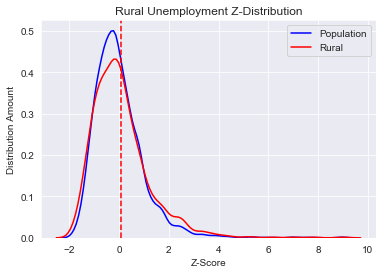

In [74]:
modules.z_plot(pop_UE_z_data, rural_UE_z_data, 'Rural Unemployment')